<a href="https://colab.research.google.com/github/Mrdaimi/Data-Science/blob/main/data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# numpy的入门

1，数组创建

In [ ]:
import numpy as np
# 可以指定dtype，也可以不指定,如果元素类型不同，会向上转化(例如整型转为浮点型)，转化失败则报错
np.array([1,2,3],dtype='float32')
# 嵌套列表组成多维数组 二维数组在处理的时候可以看成矩阵
np.array([range(i,i+3) for i in [2,4,6]])
# numpy内置的创建数组的方法(对于大型数组比之python自带的数组更高效)
# 元素都为0的数组
np.zeros(10,dtype=int)
# 元素都为1的数组 
np.ones((3,5),dtype=float)
# 元素都为指定数值的数组
np.full((3,4,5),3.15,int)
# 符合arange的一维数组
np.arange(0,20,2)
# 线性切割的一维数组
np.linspace(0,1,5)
# 0-1均匀分布的数组
np.random.random((3,3))
# 均值为0，方差为1的正态分布
np.random.normal(0,1,(3,3))
# [0,10)的随机整数数组
np.random.randint(0,10,(3,3))
# 单位矩阵
np.eye(4)
# 空的一维数组
np.empty(3)

array([0.75, 0.75, 0.  ])

2，数组的属性(大小即元素个数，形状，存储大小，数据类型)

In [ ]:
# 设置随机种子
np.random.seed(0)
x1=np.random.randint(10,size=(2,3,4))
# 数组的形状
print(x1.shape)
# 数组的元素个数
print(x1.size)
# 数组的维度
print(x1.ndim)
# 数组的元素类型
print(x1.dtype)
# 数组的单个元素占用内存大小(注意单位为字节哦)
print(x1.itemsize)
# 数组的总体占用内存大小(注意单位为字节哦)
print(x1.nbytes)

(2, 3, 4)
24
3
int64
8
192


3，数组的索引


In [ ]:
# 根据索引读取数据(全部或部分)
print(x1[0:2,0:2,0:2])
# 根据索引修改数据(全部或部分)
x1[0:2,0:2,0:2]=3
print(x1)

[[[5 0]
  [7 9]]

 [[8 8]
  [7 7]]]
[[[3 3 3 3]
  [3 3 3 5]
  [2 4 7 6]]

 [[3 3 1 6]
  [3 3 8 1]
  [5 9 8 9]]]


4，数组的变形

In [ ]:
grid=np.arange(1,10).reshape(3,3)
print(grid)
print(grid.reshape(1,9))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3 4 5 6 7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


5,数组的拼接和分裂

In [ ]:
# 拼接
x=np.arange(1,10).reshape(3,3)
y=np.random.randint(20,size=(3,3))
z=np.random.randint(20,size=(3,3))
# axis表示拼接的维度
print(np.concatenate([x,y,z],axis=1))

# 分裂 axis表示分裂的维度
print(np.split(x,[0,1],axis=1))

[[ 1  2  3 19 16 19 17 19 19]
 [ 4  5  6  5 15 15 19 14  7]
 [ 7  8  9  0 18  3  0  1  9]]
[array([], shape=(3, 0), dtype=int64), array([[1],
       [4],
       [7]]), array([[2, 3],
       [5, 6],
       [8, 9]])]


6，数组的聚合

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # python内置的聚合函数和numpy的聚合函数的效率对比
# bigarr=np.random.rand(1000000).reshape(10,100000)
# %timeit sum(bigarr)
# %timeit np.sum(bigarr)

data=pd.read_csv('/content/drive/MyDrive/DataSet/datasciencehandbook_dataset/president_heights.csv')
order=np.array(data['order'])
name=np.array(data['name'])
height=np.array(data['height(cm)'])

# 开始计算数据的某些统计值
height_mean=height.mean()

# 画图
plt.hist(height)
plt.title('height distribution of us prisident')
plt.xlabel('height (cm)')
plt.ylabel('number')

In [ ]:
# 通用函数中广播机制的应用
import numpy as np
import matplotlib.pyplot as plt
# 1, 数组归一化
x=np.random.random((10,3))
(x-x.mean(0)).mean(0)

# 2，画一个二维数组
x=np.linspace(0,5,50)
# 后面跟着的相当于reshape,np.newaxis表示1，:表示剩余的维度(numpy自动运算得出)
y=np.linspace(0,5,50)[:,np.newaxis]
z=np.sin(x)**10+np.cos(10+y*x)*np.cos(x)
# cmap(colormap)表示颜色集，extent表示边界范围(先x轴后y轴)
plt.imshow(z,extent=[0,5,0,4],cmap='viridis')
plt.colorbar()

7，比较，掩码，布尔逻辑

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

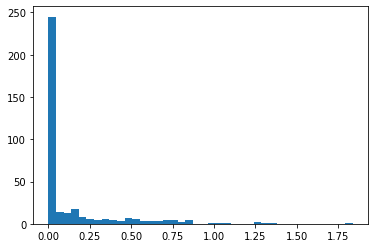

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# .values转化为numpy的一维数组
rainfall=pd.read_csv('/content/drive/MyDrive/DataSet/datasciencehandbook_dataset/Seattle2014.csv')['PRCP'].values
inches=rainfall/254
# hist里面的数字表示直方图的组数
plt.hist(inches,40)

# pandas的入门

# matplotlib的入门

1，简单演示

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# !jupyter --version 查看colab自带的环境及版本
# mpl.__version__ 查看colab自己下载的库及版本

# 设置绘图格式
plt.style.use('classic')

x=np.linspace(0,2,100)
# plot里面的参数顺序表示x轴和y轴
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

NameError: ignored

2，两种风格画图

In [ ]:
# plt.figure()不用也没关系
# subplot表示布局前两个参数表示行和列，即子图的排列(显然子图的数量必须等于两者相乘)，最后一个参数是序号(从第一行开始排)

# matlab风格
plt.subplot(2,2,1)
plt.plot(x,np.sin(x))
plt.subplot(2,2,2)
plt.plot(x,np.cos(x))
plt.subplot(2,2,3)
plt.plot(x,np.tan(x))
plt.subplot(2,2,4)
plt.plot(x,np.arctan(x))

# 面向对象风格(感觉代码更简洁)
# subplots里面的参数表示图像的个数，默认使用竖向排列
fig,ax=plt.subplots(2)
ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))

NameError: ignored

3，折线图

In [ ]:
# 画出一元线性函数的图像
plt.style.use("seaborn-whitegrid")
ax=plt.axes()
y=np.linspace(0,10,1000)
# 同一个ax表示同一个表,plot里面的前两个参数表示一元函数关系，color表示线的颜色，linestyle表示线样式
ax.plot(x,x,color='#4e6ef2',linestyle='-',label='x')
ax.plot(x,x+1,color='#4e6ef2',linestyle='--',label='x+1')
ax.plot(x,x+2,color='#4e6ef2',linestyle='-.',label='x+2')
ax.plot(x,x+3,color='#4e6ef2',linestyle=':',label='x+3')
# 设置坐标轴上下限
# a,使用xlim和ylim
plt.xlim(0,1.5)
plt.ylim(0,4)
# b,使用axis
plt.axis([0,1,0,2])

# plt.axis的其他用法(只能选一种)
# 收缩坐标轴,不留空白区域
plt.axis('tight')
# 图像的分辨率为1:1
plt.axis('equal')

# 设置图形标签
plt.title('my firt form')
plt.xlabel('x')
plt.ylabel('y')
ax.legend()

4,散点图

In [ ]:
# # 使用plt.plot画散点图
# # 第一张图：散点图
# x=np.linspace(0,10,30)
# y=np.sin(x)
# plt.plot(x,y,'o',color='#000000')
# # plt.show()

# # 第二张图：散点图
# rng=np.random.RandomState(0)
# for marker in ['o','.',',','x','+','v','^','<','>','s','d']:
#   plt.plot(rng.rand(5),rng.rand(5),marker,label='marker={0}'.format(marker))
# plt.legend(numpoints=1)
# plt.xlim(0,1.8)
# # plt.show()

# # 第三张图：散点折线图 -p表示图标的类型
# plt.plot(x,y,'-p',color='gray')
# # plt.show()

# # 使用plt.scatter画散点图 可以更加灵活的控制每一个点

# # 第一张图
# colors=rng.rand(100)
# # s表示圆圈大小(单位为px)，c表示点的颜色,alpha表示颜色的透明度
# plt.scatter(rng.randn(100),rng.randn(100),c=rng.rand(100),s=1000*rng.rand(100),alpha=0.3,cmap='viridis')
# # 显示颜色条
# plt.colorbar()

# 第二张图
from sklearn.datasets import load_iris
iris=load_iris()
# T表示对data数组进行转置
features=iris.data.T
plt.scatter(features[0],features[1],c=iris.target,cmap='viridis',s=100,alpha=0.2)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

5，误差可视化

In [ ]:
# 离散误差
x=np.linspace(0,10,50)
y=np.sin(x)+0.8*np.random.randn(50)
# yerr表示每个点的误差范围  fmt表示点的格式
plt.errorbar(x,y,yerr=0.8,fmt='.k')
plt.errorbar(x,y,yerr=0.8,fmt='o',color='#000000',ecolor='lightgray',elinewidth=3,capsize=0)

# 连续误差
# 暂时不搞，因为对高斯过程回归方法不清楚

6，配置图例

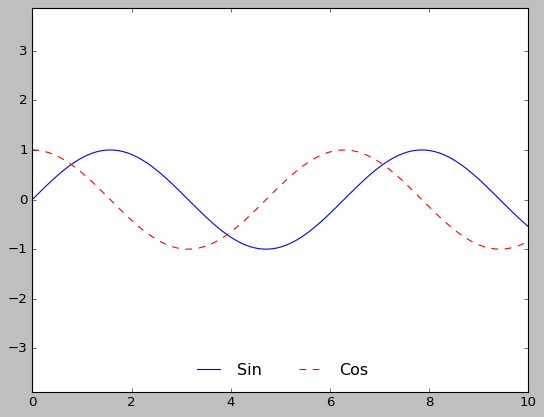

In [ ]:
plt.style.use('classic')
x=np.linspace(0,10,1000)
fig,ax=plt.subplots()
ax.plot(x,np.sin(x),'-b',label='Sin')
ax.plot(x,np.cos(x),'--r',label='Cos')
ax.axis('equal')
# 图例显示必须使用legend
leg=ax.legend(loc='upper left',frameon=False)
leg=ax.legend(loc='lower center',ncol=2,frameon=False)


In [ ]:
!git clone https://github.com/jakevdp/PythonDataScienceHandbook.git
!ls -R

fatal: destination path 'PythonDataScienceHandbook' already exists and is not an empty directory.
.:
PythonDataScienceHandbook  sample_data

./PythonDataScienceHandbook:
environment.yml  LICENSE-TEXT  README.md	 tools
LICENSE-CODE	 notebooks     requirements.txt  website

./PythonDataScienceHandbook/notebooks:
00.00-Preface.ipynb
01.00-IPython-Beyond-Normal-Python.ipynb
01.01-Help-And-Documentation.ipynb
01.02-Shell-Keyboard-Shortcuts.ipynb
01.03-Magic-Commands.ipynb
01.04-Input-Output-History.ipynb
01.05-IPython-And-Shell-Commands.ipynb
01.06-Errors-and-Debugging.ipynb
01.07-Timing-and-Profiling.ipynb
01.08-More-IPython-Resources.ipynb
02.00-Introduction-to-NumPy.ipynb
02.01-Understanding-Data-Types.ipynb
02.02-The-Basics-Of-NumPy-Arrays.ipynb
02.03-Computation-on-arrays-ufuncs.ipynb
02.04-Computation-on-arrays-aggregates.ipynb
02.05-Computation-on-arrays-broadcasting.ipynb
02.06-Boolean-Arrays-and-Masks.ipynb
02.07-Fancy-Indexing.ipynb
02.08-Sorting.ipynb
02.09-Structured-Data-NumPy.